In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,781 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [3]:
# Add every font at the specified location
for font in mpl.font_manager.findSystemFonts():
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Liberation Sans
NanumGothic
Humor Sans
Liberation Mono
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Serif
NanumSquare
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Sans
NanumSquareRound
NanumGothic
NanumMyeongjo
Liberation Serif
Liberation Serif
Liberation Mono
Liberation Mono
NanumBarunGothic
NanumSquareRound
Liberation Serif
Liberation Sans
NanumSquare
Liberation Sans Narrow
NanumBarunGothic
NanumMyeongjo


In [4]:
# Set font family globally
mpl.rcParams['font.family'] = 'NanumSquare'# 폰트명
print(mpl.rcParams['font.family'])

['NanumSquare']


In [5]:
a = pd.read_csv('/content/drive/MyDrive/Miniproject_No_1/0.Code&Data/datas/임대료/영세자영업+규모별+면적(3.3㎡)당+매출액_20230314151134.csv')

In [6]:
food_sales_mean = a.iloc[2:13,:]

In [7]:
food_sales_mean.columns = ['외식업','외식업종류','16.5㎡ 이하','33㎡ 이하','66㎡ 이하','99㎡ 이하','99㎡ 초과']

In [8]:
food_sales_mean.index = food_sales_mean['외식업종류']

In [9]:
food_sales_mean = food_sales_mean[['16.5㎡ 이하','33㎡ 이하','66㎡ 이하','99㎡ 이하','99㎡ 초과']]

서울시 상가규모별 상가수  
16.5㎡ 이하: 38,020개  
16.5㎡ 초과 ~ 33㎡ 이하: 65,793개  
33㎡ 초과 ~ 66㎡ 이하: 67,124개  
66㎡ 초과 ~ 99㎡ 이하: 63,618개  
99㎡ 초과: 37,264개  

In [10]:
food_sales_mean

,16.5㎡ 이하,33㎡ 이하,66㎡ 이하,99㎡ 이하,99㎡ 초과
외식업종류,,,,,
소계,94,118,184,249,333
한식음식점,102,119,187,265,368
중식음식점,105,158,240,311,389
일식음식점,173,176,236,290,381
양식음식점,143,151,198,247,315
제과점,113,112,259,424,497
패스트푸드점,110,159,240,361,424
치킨전문점,128,185,248,298,387
분식전문점,77,120,222,309,333


In [11]:
#업종별 평균매출 구하기
food_mean=[]
food_total=[]
total= []
for i in range(11):
    for j in food_sales_mean.iloc[i]:
        food_mean.append(j)#데이터 값 하나씩 뽑아서 리스트에 담음
food_mean = [int(i) for i in food_mean]#인트타입변경
for _ in range(len(food_mean)):
    if _ % 5 == 0:
        food_total.append(food_mean[_]*38020)
    if _% 5 == 1:
        food_total.append(food_mean[_]*65793)
    if _% 5 == 2:
        food_total.append(food_mean[_]*67124)
    if _% 5 == 3:
        food_total.append(food_mean[_]*63618)
    if _% 5 == 4:
        food_total.append(food_mean[_]*37264)
        total.append(round(sum(food_total)/271819,3))
        food_total=[]
print(total)

[191.076, 201.721, 238.313, 245.182, 206.439, 274.243, 255.755, 246.724, 212.609, 133.995, 118.751]


In [12]:
food_sales_mean['평균'] = total

In [16]:
food_sales_mean.sort_values('평균',ascending=False)

,16.5㎡ 이하,33㎡ 이하,66㎡ 이하,99㎡ 이하,99㎡ 초과,평균
외식업종류,,,,,,
제과점,113,112,259,424,497,274.243
패스트푸드점,110,159,240,361,424,255.755
치킨전문점,128,185,248,298,387,246.724
일식음식점,173,176,236,290,381,245.182
중식음식점,105,158,240,311,389,238.313
분식전문점,77,120,222,309,333,212.609
양식음식점,143,151,198,247,315,206.439
한식음식점,102,119,187,265,368,201.721
소계,94,118,184,249,333,191.076


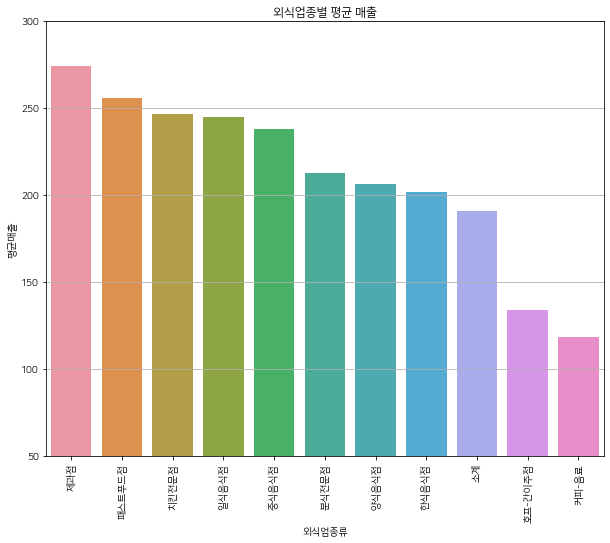

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(y = food_sales_mean.sort_values('평균',ascending=False)['평균'], x=food_sales_mean.sort_values('평균',ascending=False)['평균'].index)
plt.title('외식업종별 평균 매출')
plt.xticks(rotation=90)
plt.ylim(50,300)
plt.ylabel('평균매출')
plt.grid(axis='y')
plt.show()
#치킨집이 3번째로 평균매출이 높음==> 이유:제과제빵 기술이 없고 비교적 만만한 치킨집으로 골랐다?